In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### CCCA in denoising

0.7347437080720753 0.7346351351214653 1.0


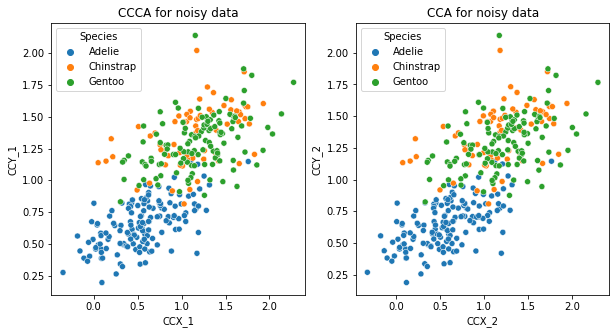

In [5]:
from sklearn.cross_decomposition import CCA
import seaborn as sns

class data_creation:
    def __init__(self,mean,std):
        self.std = std
        self.mean = mean
    
    def create_data(self):
        link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
        df = pd.read_csv(link2data)
        df =df.dropna()

        X = df[['bill_length_mm','bill_depth_mm']].values
        Z = np.random.normal(self.mean,self.std,(X.shape[0],X.shape[1]))
        X1 = X + Z
        X1_mc = (X1-X1.mean())/(X1.std())
        X_mc = (X-X.mean())/(X.std())

#         Y = df[['flipper_length_mm','body_mass_g']].values
        
        Y = X
        Y_mc = (Y-Y.mean())/(Y.std())

        Z = np.random.normal(self.mean,self.std,(X_mc.shape[0],X_mc.shape[1]))
        Z_mc = (Z-Z.mean())/(Z.std())
        return(df,X_mc,X1_mc,Y_mc,Z_mc)
    
class apply_CCCA(data_creation):
    def __init__(self,mean,std):
        super().__init__(mean,std)
    
    def test_CCCA(self):
        df,X_mc,X1_mc,Y_mc,Z_mc = self.create_data()
        
        lambd = [0.2]

        for i in lambd:
#             print("For noisy Xs")
#             print(np.corrcoef(X1_mc[:,0], Y_mc[:,0]))
#             print(np.corrcoef(X1_mc[:,0], Y_mc[:,1]))
#             print(np.corrcoef(X1_mc[:,1], Y_mc[:,0]))
#             print(np.corrcoef(X1_mc[:,1], Y_mc[:,1]))
            
#             print("For denoisy Xs")
#             print(np.corrcoef(X_mc[:,0], Y_mc[:,0]))
#             print(np.corrcoef(X_mc[:,0], Y_mc[:,1]))
#             print(np.corrcoef(X_mc[:,1], Y_mc[:,0]))
#             print(np.corrcoef(X_mc[:,1], Y_mc[:,1]))
            T_mc = Y_mc - i*Z_mc
            ca = CCA()
            ca.fit(X1_mc,T_mc)
            X_c1 = X1_mc@ca.x_weights_
            Y_c1 = Y_mc@ca.y_weights_
#             print("After CCCA on noisy data")
            t1 = np.corrcoef(X_c1[:,0], Y_c1[:,0])[0,1]
            
            ca = CCA()
            ca.fit(X1_mc,Y_mc)
            X_c2 = X1_mc@ca.x_weights_
            Y_c2 = Y_mc@ca.y_weights_
#             print("After CCA on noisy data")
            t2 = np.corrcoef(X_c2[:,0], Y_c2[:,0])[0,1]
            
            ca = CCA()
            ca.fit(X_mc,Y_mc)
            X_c3 = X_mc@ca.x_weights_
            Y_c3 = Y_mc@ca.y_weights_
            # CCA on denoisy data
            t3 = np.corrcoef(X_c3[:,0], Y_c3[:,0])[0,1]
            
            #plotting
            cc_res = pd.DataFrame({"CCX_1":X_c1[:, 0],
                       "CCY_1":Y_c1[:, 0],
                       "CCX_2":X_c2[:, 0],
                       "CCY_2":Y_c2[:, 0],
                       "CCX_3":X_c3[:, 0],
                       "CCY_3":Y_c3[:, 0],
                       "Species":df["species"].tolist()})
            
            pfig, axs = plt.subplots(1, 2, figsize=(10, 5))
            sns.scatterplot(ax=axs[0],x="CCX_1",
                            y="CCY_1", 
                            hue="Species", data=cc_res)

            axs[0].set_title("CCCA for noisy data")
            sns.scatterplot(ax=axs[1],x="CCX_2",
                            y="CCY_2", 
                            hue="Species", data=cc_res)

            axs[1].set_title("CCA for noisy data")
            return(t1,t2,t3)

k1=[]
k2=[]
k3=[]

obj = apply_CCCA(0,5)
a,b,c = obj.test_CCCA()
print(a,b,c)

### CCCA in removing confounders

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')
correlation without confounder -0.7154143532121043
correlation with confounder 0.7754007719718081


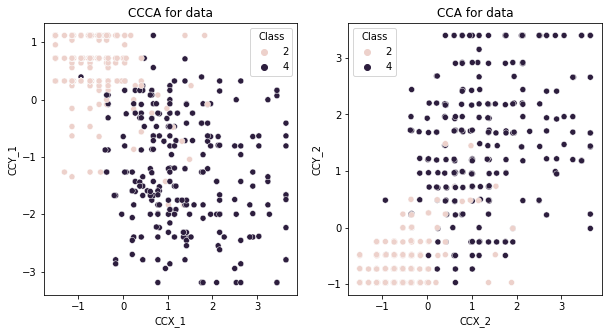

In [138]:
class CCCA_confounder:
    def __init__(self):
        pass
    
    def create_dataset(self):
        link2data = "/u/home/a/asarkar/project-jflint/ContrastCCA/cancer.csv"
        df = pd.read_csv(link2data,dtype=object)
        df =df.dropna()
        df = df.drop(["bare_nucleoli"],axis=1)
        df = df.apply(pd.to_numeric)
        print(df.columns)
        X = df[["clump_thickness","epithelial_size"]]
        X_mc = ((X-X.mean())/(X.std())).values
        
        Y = df[["normal_nucleoli","bland_chromatin"]]
        Y_mc = ((Y-Y.mean())/(Y.std())).values
        
        Z = df[["marginal_adhesion","shape_uniformity"]]
        Z_mc = ((Z-Z.mean())/(Z.std())).values
        return(df,X_mc,Y_mc,Z_mc)
    
    def test_CCCA_confd(self):
        df,X_mc,Y_mc,Z_mc = self.create_dataset()
        
        lamd = 0.5
        
        T_mc = Y_mc - i*Z_mc
        ca = CCA()
        ca.fit(X_mc,T_mc)
        X_c1 = X_mc@ca.x_weights_
        Y_c1 = Y_mc@ca.y_weights_
        t1 = np.corrcoef(X_c1[:,0], Y_c1[:,0])[0,1]
            
        ca = CCA()
        ca.fit(X_mc,Y_mc)
        X_c2 = X_mc@ca.x_weights_
        Y_c2 = Z_mc@ca.y_weights_
#             print("After CCA on noisy data")
        t2 = np.corrcoef(X_c2[:,0], Y_c2[:,0])[0,1]
            
        #plotting
        cc_res = pd.DataFrame({"CCX_1":X_c1[:, 0],
                    "CCY_1":Y_c1[:, 0],
                    "CCX_2":X_c2[:, 0],
                    "CCY_2":Y_c2[:, 0],
                    "Class":df["class"].tolist()})
            
        pfig, axs = plt.subplots(1, 2, figsize=(10, 5))
        sns.scatterplot(ax=axs[0],x="CCX_1",
                        y="CCY_1", 
                        hue="Class", data=cc_res)

        axs[0].set_title("CCCA for data")
        
        sns.scatterplot(ax=axs[1],x="CCX_2",
                        y="CCY_2", 
                        hue="Class", data=cc_res)

        axs[1].set_title("CCA for data")
        
        print("correlation without confounder",t1)
        print("correlation with confounder",t2)
        
obj = CCCA_confounder()
obj.test_CCCA_confd()

(400, 30) (400, 30) (400, 30)
0.9332646265267385
0.24267694264866335
0.2437470337390824


Text(0.5, 1.0, 'CCCA With background')

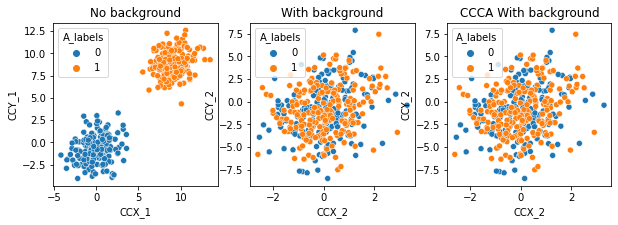

In [51]:
import numpy as np

N=400; D = 30; gap=3
# In B, all the data pts are from the same distribution, which has different variances in three subspaces.
B = np.zeros((N, D))
B[0:100, 20:30] = 0.6*np.ones((100,10))
B[0:100, 15:30] = 0.8*np.ones((100,15))
B[0:100, 22:30] = 0.9*np.ones((100,8))
B[0:100, 21:30] = np.ones((100,9))

A = np.zeros((N, D))
C = np.zeros((N, D))

# In A there are four clusters.
A[:,0:10] = np.random.normal(0,10,(N,10))
C[:,0:10] = np.random.normal(0,10,(N,10))
# group 1
A[0:200, 10:20] = np.random.normal(0,1,(200,10))
A[0:200, 20:30] = np.random.normal(0,1,(200,10))
# group 2
A[200:400, 10:20] = np.random.normal(0,1,(200,10))
A[200:400, 20:30] = np.random.normal(gap,1,(200,10))

# group 1
C[0:200, 10:20] = np.random.normal(2*gap,1,(200,10))
C[0:200, 20:30] = np.random.normal(0,1,(200,10))
# group 2
C[200:400, 10:20] = np.random.normal(2*gap,1,(200,10))
C[200:400, 20:30] = np.random.normal(gap,1,(200,10))

A_labels = [0]*200+[1]*200
print(A.shape,B.shape,C.shape)

ca = CCA()
ca.fit(A,C)
X_c1 = A@ca.x_weights_
Y_c1 = C@ca.y_weights_
#             print("After CCCA on noisy data")
print(np.corrcoef(X_c1[:,0], Y_c1[:,0])[0,1])

# this is A1
A1 = np.zeros((N, D))
A1[0:200, 10:20] = np.random.normal(0,1,(200,10))
A1[0:200, 20:30] = np.ones((200,10))
A1[200:400, 10:20] = np.random.normal(0,1,(200,10))
A1[200:400, 20:30] = np.ones((200,10))

ca = CCA()
ca.fit(A1,C)
X_c2 = A1@ca.x_weights_
Y_c2 = C@ca.y_weights_
print(np.corrcoef(X_c2[:,0], Y_c2[:,0])[0,1])

lamb = 0.2
ca = CCA()
ca.fit(A1,C-lamb*B)
X_c3 = A1@ca.x_weights_
Y_c3 = C@ca.y_weights_
print(np.corrcoef(X_c3[:,0], Y_c3[:,0])[0,1])

#plotting
cc_res = pd.DataFrame({"CCX_1":X_c1[:, 0],
            "CCY_1":Y_c1[:, 0],
            "CCX_2":X_c2[:, 0],
            "CCY_2":Y_c2[:, 0], 
            "CCX_3":X_c3[:, 0],
            "CCY_3":Y_c3[:, 0],
            "A_labels":A_labels})
            
pfig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.scatterplot(ax=axs[0],x="CCX_1",
                y="CCY_1", 
                hue="A_labels", data=cc_res)
axs[0].set_title("No background")

sns.scatterplot(ax=axs[1],x="CCX_2",
                y="CCY_2", 
                hue="A_labels", data=cc_res)
axs[1].set_title("With background")

sns.scatterplot(ax=axs[2],x="CCX_2",
                y="CCY_2", 
                hue="A_labels", data=cc_res)
axs[2].set_title("CCCA With background")

### CCCA in image processing

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [2]:
import numpy as np
import pandas as pd

y1 = pd.DataFrame(y)
y1 = y1.values
Y0 = y1[list(np.where((y1=='0'))[0])]
Y1 = y1[list(np.where((y1=='1'))[0])]

x1 = pd.DataFrame(x)
x1 = x1.values
X0 = x1[list(np.where((y1=='0'))[0])]
X1 = x1[list(np.where((y1=='1'))[0])]

print(X0.shape,Y0.shape)

(6903, 784) (6903, 1)


In [3]:
X_1=X0[0:200]
X_2=X1[0:200]
Y_1=Y0[0:200]
Y_2=Y1[0:200]

X = np.concatenate((X_1,X_2),axis=0)
Y = np.concatenate((Y_1,Y_2),axis=0)

print(X.shape,Y.shape)

(400, 784) (400, 1)


In [4]:
from sklearn.datasets import fetch_olivetti_faces

rng = np.random.RandomState(0)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
faces = faces.reshape((-1,64,64))
faces.shape

(400, 64, 64)

In [5]:
from skimage import transform
a=[]
for i in range(faces.shape[0]):
    a.append(transform.rescale(faces[i], scale=0.4375))
a = np.asarray(a)
print(a.shape)

(400, 28, 28)


In [6]:
import matplotlib.pyplot as plt

Z1 =  x1[list(np.where((y1=='0'))[0])][400:600]
Z2 = x1[list(np.where((y1=='1'))[0])][400:600]
Z = np.concatenate((Z1,Z2),axis=0)

X = X/255.0
Z = Z/255.0

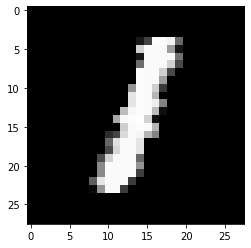

In [7]:
plt.imshow(Z[200].reshape((28,28)),cmap="gray")

Text(0.5, 1.0, 'Original face image')

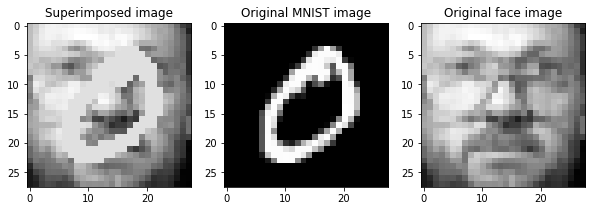

In [8]:
# superimpose
target = np.zeros((400,784))
frac = 0.75

a = a.reshape((400,784))
for i in range(400):
    target[i][np.where((X[i]>0.2))] = frac
    target[i][np.where((X[i]<=0.2))] = a[i][np.where((X[i]<=0.2))]

# print(a[0])
fig,axs = plt.subplots(1,3,figsize=(10,5))
axs[0].imshow(target[0].reshape((28,28)), cmap='gray')
axs[0].set_title("Superimposed image")
axs[1].imshow(X[0].reshape((28,28)), cmap='gray')
axs[1].set_title("Original MNIST image")
axs[2].imshow(a[0].reshape((28,28)), cmap='gray')
axs[2].set_title("Original face image")

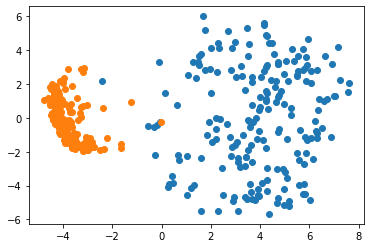

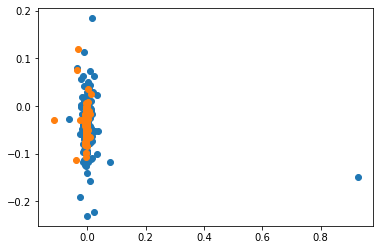

In [15]:
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_c1 = pca.transform(X)
plt.scatter(X_c1[0:200,0],X_c1[0:200,1])
plt.scatter(X_c1[200:400,0],X_c1[200:400,1])
plt.show()

ca = CCA(n_components=2)
ca.fit(X,X)
X_c1 = X@ca.x_weights_
Y_c1 = X@ca.y_weights_
plt.scatter(X_c1[0:200,0],X_c1[0:200,1])
plt.scatter(X_c1[200:400,0],X_c1[200:400,1])
plt.show()

In [110]:
ca = CCA()
ca.fit(target,Z)
X_c2 = target@ca.x_weights_
Y_c2 = Z@ca.y_weights_

0.9141173361619115


In [111]:
lambd = 0.3
T = Z - lambd*a
ca = CCA()
ca.fit(target,T)
X_c3 = target@ca.x_weights_
Y_c3 = Z@ca.y_weights_
print(np.corrcoef(X_c3[:,0], Y_c3[:,0])[0,1])

0.14568157365030532


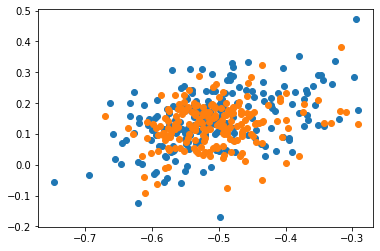

In [162]:
plt.scatter(X_c3[:,1][0:200],Y_c3[:,1][0:200])
plt.scatter(X_c3[:,1][200:400],Y_c3[:,1][200:400])
plt.show()

### Foreground and Background

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [2]:
import numpy as np
import pandas as pd

y1 = pd.DataFrame(y)
y1 = y1.values
Y0 = y1[list(np.where((y1=='0'))[0])]

x1 = pd.DataFrame(x)
x1 = x1.values
X0 = x1[list(np.where((y1=='0'))[0])]

print(X0.shape,Y0.shape)

(6903, 784) (6903, 1)


In [ ]:
Y0 = Y0[0:400]
X0 = X0[0:400]
X1 = X1[0:400]
Z0 = Z0[0:400]